# Miles Per Gallon Forecasting Regression Model  #

1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the 'mpg' dataset from Seaborn 

In [2]:
data = sns.load_dataset("mpg")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# Exploratory Data Analysis #

**Overview of Dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
#Lets drop the missing values
data.drop(['name'],axis=1,inplace=True) 

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [6]:
#Summary of the Dataset
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


- What can we tell from the data shown above:
    - the data in the following columns have a right tail implying that the data is skewed:
        1. cylinder column
        
        2. displacement column
        
        3. horsepower column

# Data Preprocessing #

In [7]:
# Lets find the missing values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
# Lets find empty values
data[data.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [9]:
# Lets drop the empty values
data.dropna(inplace=True)

In [10]:
data.model_year = 1900 + data['model_year']
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa
394,44.0,4,97.0,52.0,2130,24.6,1982,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,28.0,4,120.0,79.0,2625,18.6,1982,usa


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


# Univariate Analysis #

- Are going to examine our variables

In [12]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [13]:
data.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


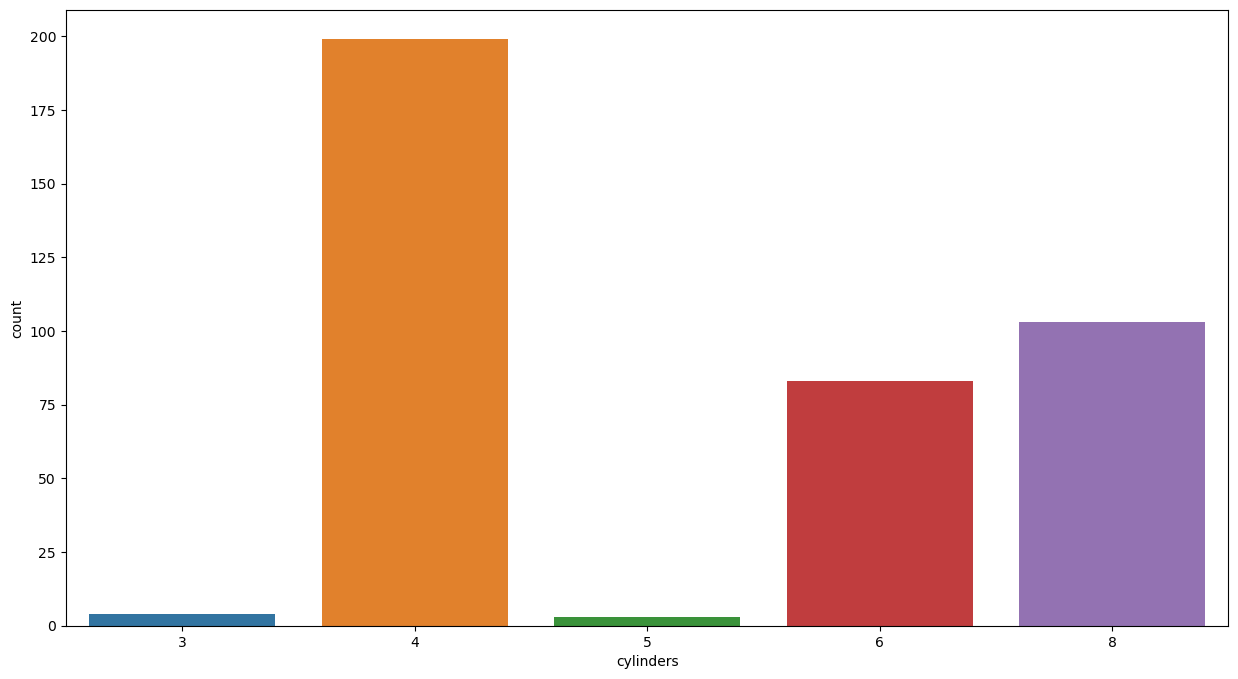

In [14]:
plt.figure(figsize=(15,8))
sns.countplot( x='cylinders', data=data)
plt.show()

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


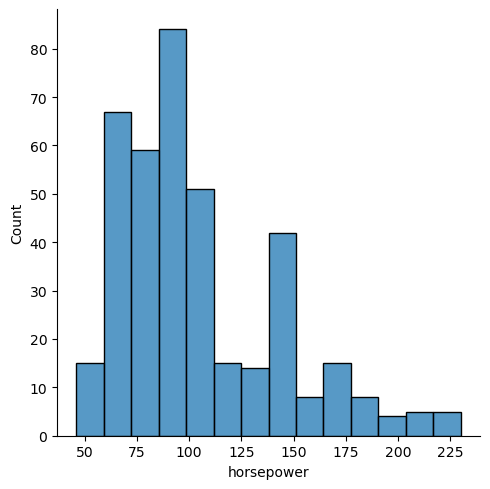

In [15]:
#The graph should have a right tail
sns.displot(data['horsepower'])
plt.show()

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


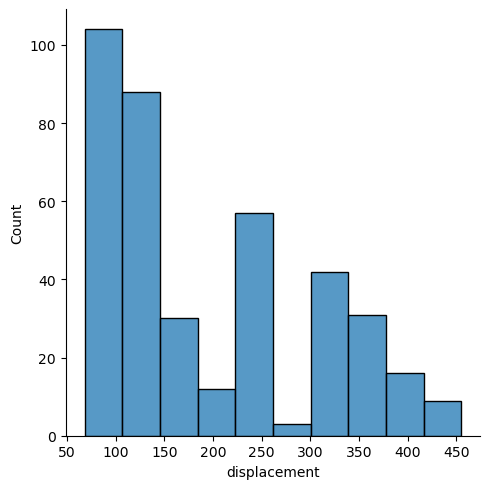

In [16]:
#The graph should have a right tail
sns.displot(data['displacement'])
plt.show()

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


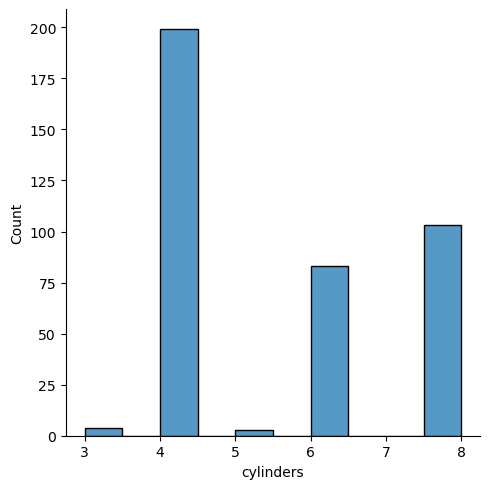

In [17]:
#The graph should have a right tail
sns.displot(data['cylinders'])
plt.show()

# Bivariate Analysis #

- Examine a relationship between target variable "mpg" and other variables

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


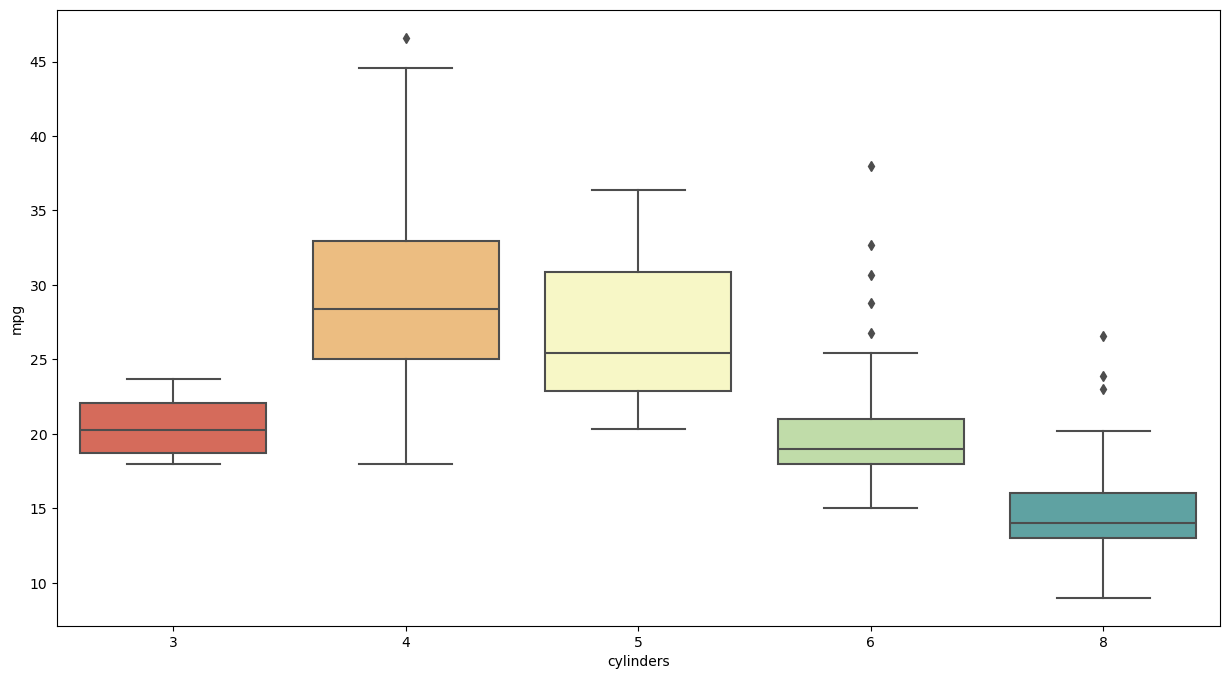

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x='cylinders',y='mpg',data= data,palette='Spectral')
plt.show()

1. As we can see cylinders have an effect on the mpg.

2. Now lets see if there is a relationship between model_year and mpg

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


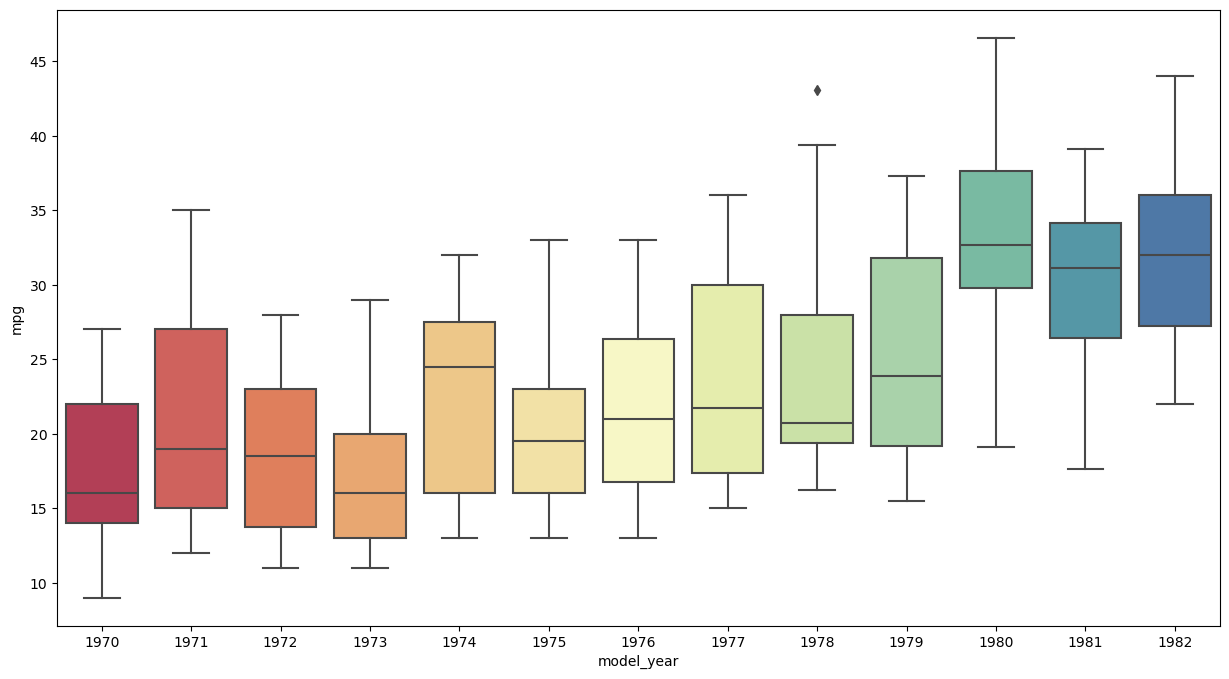

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x='model_year',y='mpg',data= data,palette='Spectral')
plt.show()

# Multivariate Analysis #

- Examine more than 2 variables and their relationships with each other.

- Lets see the difference horse power affect on mpg from different countries.

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


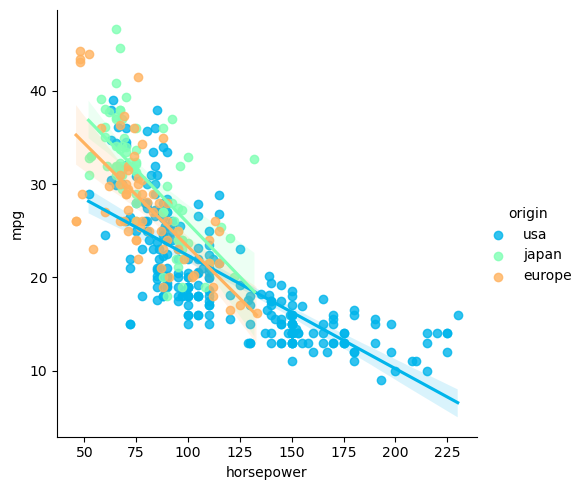

In [20]:
sns.lmplot(x='horsepower',y='mpg',hue='origin', data= data, palette ='rainbow')

plt.show()

# Problem with the graph! #

1. The graph has cut out data
2. We need to expand the axis
3. Using .set(xlim=(0,250))
         .set(ylim=(0,250))
4. Assign the graph code to a variable            

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


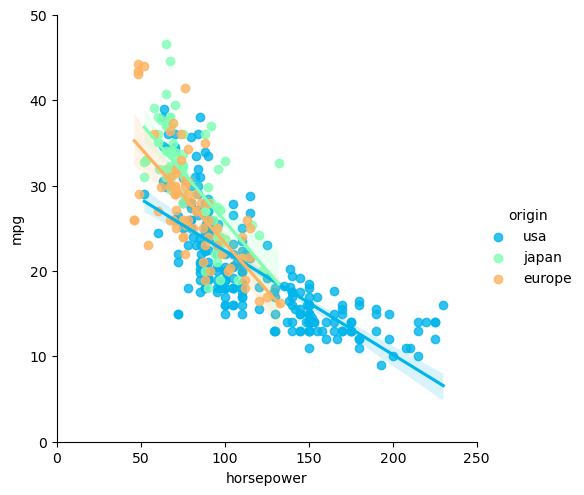

In [21]:
graph = sns.lmplot(x='horsepower',y='mpg',hue='origin', data= data, palette ='rainbow')

graph.set(xlim=(0,250))
graph.set(ylim=(0,50))

plt.show()

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


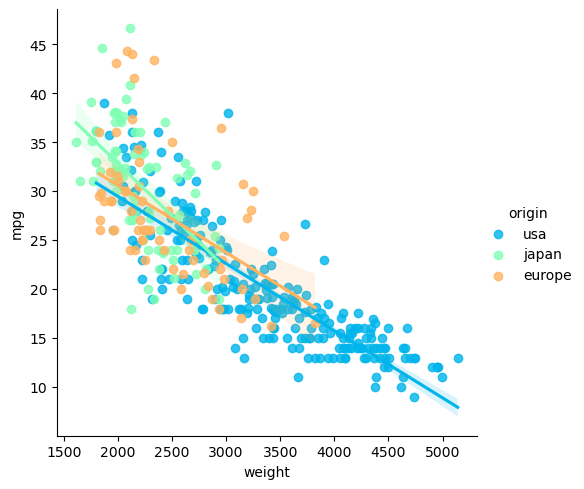

In [22]:
sns.lmplot(x='weight',y='mpg',hue='origin', data= data, palette ='rainbow')

#graph.set(xlim=(1500,250))
#graph.set(ylim=(0,50))

plt.show()

c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\George Mbugua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


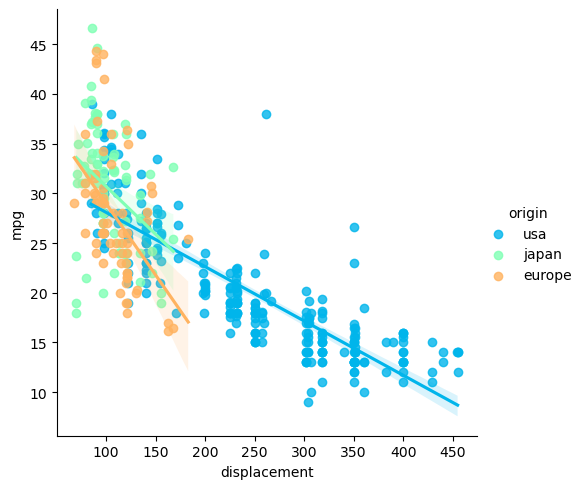

In [23]:
graph_1 = sns.lmplot(x='displacement',y='mpg',hue='origin', data= data, palette ='rainbow')
graph_1.set(xlim=(50.550))
plt.show()


# Correlation Matrix #

- Lets convert the categorical data into binary data

In [24]:
data = pd.get_dummies(data,drop_first=True)

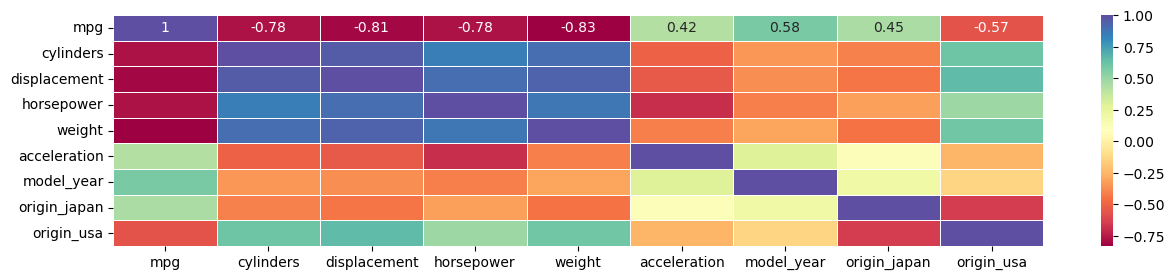

In [25]:
# use a heatmap
plt.figure(figsize=(15,3))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,cmap='Spectral')
plt.show()

# Dropping Irrelevant columns #

- Inorder to know the values to drop, you look for the column with the number closest to 1.

- Avoiding overfitting, inorder to avoid overfitting you must drop the second highest correalting values, they can be identified by the dark color red.


In [26]:
# Lets drop the lowest correaltion value and second highest value
data.drop(['acceleration','displacement'],axis=1, inplace=True)

In [27]:
data

,mpg,cylinders,horsepower,weight,model_year,origin_japan,origin_usa
0,18.0,8,130.0,3504,1970,False,True
1,15.0,8,165.0,3693,1970,False,True
2,18.0,8,150.0,3436,1970,False,True
3,16.0,8,150.0,3433,1970,False,True
4,17.0,8,140.0,3449,1970,False,True
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,1982,False,True
394,44.0,4,52.0,2130,1982,False,False
395,32.0,4,84.0,2295,1982,False,True
396,28.0,4,79.0,2625,1982,False,True


# Feature Engineering #

- Lets create a value added product

- Take model_year - the current year

- from datetime import datetime

In [28]:
from datetime import datetime

In [29]:
import datetime

# Get the current date
today = datetime.date.today()

# Extract the year
current_year = today.year

print(current_year)


2024


In [30]:
data['car_age'] = current_year - data.model_year

data.drop(["model_year"],axis=1,inplace=True)

data

,mpg,cylinders,horsepower,weight,origin_japan,origin_usa,car_age
0,18.0,8,130.0,3504,False,True,54
1,15.0,8,165.0,3693,False,True,54
2,18.0,8,150.0,3436,False,True,54
3,16.0,8,150.0,3433,False,True,54
4,17.0,8,140.0,3449,False,True,54
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,False,True,42
394,44.0,4,52.0,2130,False,False,42
395,32.0,4,84.0,2295,False,True,42
396,28.0,4,79.0,2625,False,True,42


# Modelling #

- Lets define the independent variable which is x and dependent variable which the target variable y

In [31]:
X = data.drop(['mpg'],axis=1)
y = data['mpg']

y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split 

# Problem Area #

- When assigning variables in train_test_split always assign in this order:

    - X_train,X_test,y_train,y_test 

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train

,cylinders,horsepower,weight,origin_japan,origin_usa,car_age
260,6,110.0,3620,False,True,46
184,4,92.0,2572,False,True,48
174,6,97.0,2984,False,True,49
64,8,150.0,4135,False,True,52
344,4,64.0,1875,False,True,43
...,...,...,...,...,...,...
72,8,150.0,3892,False,True,52
107,6,100.0,2789,False,True,51
272,4,85.0,2855,False,True,46
352,4,65.0,2380,False,True,43


In [35]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

# Modelling Contiuned #

- import the libraries for the linear regression model

    - from sklearn.linear_model import linear_regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm_model = LinearRegression()
lm_model

LinearRegression()

In [38]:
lm_model.fit(X_train, y_train)
#Now that the model is trainined.

LinearRegression()

Now the model is trainined, we have the linear regression model we have the linear regression

- Rember this formula:

    Y = B1X1 + B1X2 + B3X3 + B4X4 + a

    Y = predicted value
    B1..B3 = coefficients of variables
    a = value of Y when x=0

# Find the residual value or intercept #    

In [39]:
lm_model.intercept_

79.80442103966976

# Finding the Coefficints of the other variables #

In [40]:
coeff_param = pd.DataFrame(lm_model.coef_,index=X.columns,columns=["Coefficient"])

coeff_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
origin_japan,0.401853
origin_usa,-2.385047
car_age,-0.779904


# Understanding the Data #

- Cars from USA have a heavy impact on the mpg. 

    - What the coefficients are communicating is that every car that is from the USA will have a negative effect on mpg by -2.385.

- Origin is an important feature in mpg

# Making Predictions #

- We can create visualization and compare our actual vs prediction

In [41]:
y_prediction = lm_model.predict(X_test)
y_prediction

array([26.54517421, 27.10231267, 33.98228639, 24.70664728, 28.27566369,
       30.1765714 ,  8.11519194, 30.32629444, 20.37965446, 29.45264374,
       12.18554756, 25.6760638 , 16.77792925, 29.30500437, 23.73057197,
       29.30722869, 20.52783528, 32.9589534 , 26.7082771 , 30.73400414,
       18.9492977 , 34.92264841, 35.14900786, 15.01631255, 29.42800412,
       26.59268508, 21.76475948, 16.11604977, 29.01957127, 24.60146333,
       13.34142484, 23.09944227, 21.52754347, 31.3403537 , 11.57340894,
       35.8857656 , 11.49790749, 24.36547976, 11.90884754,  7.44935735,
       13.17314238, 28.48416952, 35.47084837, 27.34178886, 12.05582117,
        9.10159978, 17.08620349, 32.34251061, 23.68307206, 31.09433673,
       11.74713777, 26.06944415, 22.65355802, 34.64349824, 28.05626653,
       17.2793678 , 20.81997137, 22.31406343, 23.55207772, 25.57598588,
        7.72272654, 22.25574874, 26.44752998, 24.21636598, 29.39111579,
       29.31748317, 25.52878565, 30.31443243, 22.33471971,  9.25

In [42]:
# Lets create a dicitionary key and values
my_dict = {'Actual ':  y_test, 'Prediction ': y_prediction}

# Lets add to a Data Frame 
comparison = pd.DataFrame(my_dict)
# Lets select a random sample of 10
comparison.sample(10)

,Actual,Prediction
277,16.2,23.730572
291,19.2,21.527543
152,19.0,20.379654
134,16.0,17.279368
380,36.0,34.643498
375,36.0,35.470848
47,19.0,17.086203
30,28.0,22.653558
296,27.4,26.708277
394,44.0,34.922648


# Evaluation Metric #

- Since we are dealing with a Regression Problem we will use the Regressiom metrics:

    1. Mean Squared Error
    2. Mean Absolute Error
    3. Root Mean Squared Error
    4. R2_Score

**Import the library**    

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [44]:
# Lets create a funtion to calculate the metrics

def evaluation(actual,prediction):
    MSE = mean_squared_error(actual, prediction)
    MAE = mean_absolute_error(actual,prediction)
    RMSE = np.sqrt(mean_squared_error(actual,prediction))
    SCORE = r2_score(actual,prediction)

    return print("r2_score :", SCORE,'\n','MAE :', MAE,"\n",'MSE',MSE,"\n",'RMSE', RMSE)

In [57]:
print(evaluation(y_test,y_prediction))

r2_score : 0.7798249880881913 
 MAE : 2.518828157615085 
 MSE 11.237861022823024 
 RMSE 3.352291905968665
None


# Adding Innovation to your code using Yellow Brick #

- import the libray
    from yellowbrick.family import estimator
    

In [46]:
from yellowbrick.regressor import PredictionError

c:\Users\George Mbugua\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


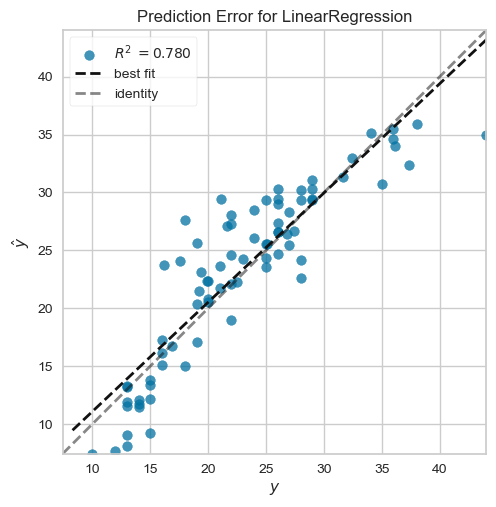

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [47]:
visualizer = PredictionError(lm_model)

visualizer.fit(X_train,y_train)

visualizer.score(X_test,y_test)

visualizer.show()

# Lets Visualize Residual Variables #

**We will still use the regressor family in yellowbrick  and import residual values estimator called ResidualsPlot**

- from yellowbrick.regressor import ResidualsPlot

- Copy and past the same code from the Prediction Error for Linear Regression BUT change PredictionError to ResidualsPlot


In [48]:
from yellowbrick.regressor import ResidualsPlot

c:\Users\George Mbugua\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


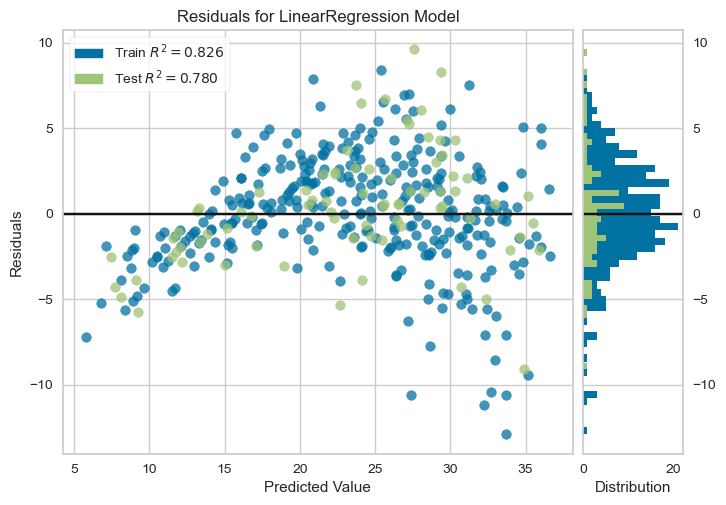

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train,y_train)

visualizer.score(X_test,y_test)

visualizer.show()

# Always Remember this fact #

## Interpreting the Difference: ##

1. Small difference: (less than 0.1) indicates good generalization. 

2. The model captures the true relationship in the data without overfitting to specific training points.

3. Large difference: (greater than 0.2) signifies potential overfitting. The model memorized the training data but might not perform well on new data. This can lead to inaccurate predictions.


In [50]:
train_r2 = 0.826

test_r2 = 0.780

diff = train_r2 - test_r2

diff

0.04599999999999993

## Our Generalization is below 0.1 therefore is can be categorized as a good generalization ##

# K-fold Cross Vaildation

- A method of splitting the dataset for evaluating classification models and training the model.

In [54]:
from sklearn.model_selection import cross_val_score

accurcies = cross_val_score(estimator=lm_model,X=X_train,y=y_train,cv=15)
accurcies

array([0.82685278, 0.82910941, 0.81063662, 0.8041622 , 0.82352765,
       0.78359575, 0.67224225, 0.7616888 , 0.8279452 , 0.8044937 ,
       0.90064065, 0.66943571, 0.83396474, 0.85173071, 0.88671594])

In [55]:

accurcies.mean()

0.8057828077066201

In [ ]:
accurcies = cross_val_score(estimator=lm_model,X=X_train,y=y_train,cv=15,scoring="roc_auc")
-accurcies.mean()

11.624148728101257

# Comparison

- The r2_score of the model when we used the test data was 0.7798249880881913 and after the K-fold cross validation was done 15 times the average score was 0.80578280. This shows that the model is accurate

- The MAE of the model was 11.237861022823024 and after the cross validation its 11.624148728101257. This shows that the model is accurate